## <center> Mastering Clustering techniques using Sklearn

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [7]:
## make a folder to store/save plots
folder_name = "plots"
#os.makedirs(folder_name, exist_ok=True)
base_der=f'./{folder_name}/'


In [2]:
df= pd.read_csv("https://raw.githubusercontent.com/PJalgotrader/Machine_Learning-USU/main/data/Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
df.drop("CustomerID", axis=1, inplace=True)

In [5]:
df=pd.get_dummies(df,drop_first=True)
df.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
0,19,15,39,True
1,21,15,81,True
2,20,16,6,False
3,23,16,77,False
4,31,17,40,False


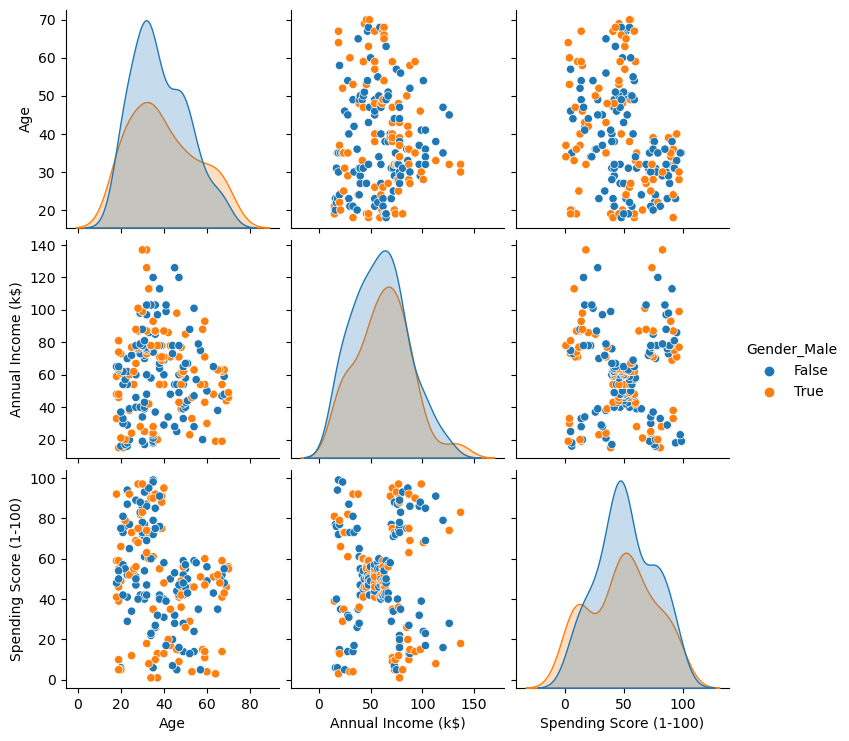

In [8]:
sns.pairplot(df,hue="Gender_Male")
plt.savefig(base_der+"pair_plot_cluster.png")
plt.show()

1.   What can you conclude by focusing on Spending Score vs Annual income? do you see the clusters? How many?

2.   The standard k-means algorithm isn't directly applicable to categorical data. Why? In this specific example, do you think it is a good idea to keep gender in the model? why? It seems that both male and female appear equally in each cluster!

Beyond K-Means algorithm:
    K-mode clustering: https://pypi.org/project/kmodes/
    K-prototype clustering: https://towardsdatascience.com/the-k-prototype-as-clustering-algorithm-for-mixed-data-type-categorical-and-numerical-fe7c50538ebb

### Scaling the features

In [9]:
# let's start by scaling the continuous random variables
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']] = scaler.fit_transform(df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])
df.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
0,-1.424569,-1.738999,-0.434801,True
1,-1.281035,-1.738999,1.195704,True
2,-1.352802,-1.700830,-1.715913,False
3,-1.137502,-1.700830,1.040418,False
4,-0.563369,-1.662660,-0.395980,False



Dropping 'Gender' from the Model

Pros:

    Algorithm Suitability: K-means is inherently better suited for continuous variables. By excluding 'Gender', you align more closely with the assumptions and strengths of the algorithm.
    Simpler Interpretation: Clusters derived without 'Gender' will be based purely on spending behavior and income, which might be more straightforward to interpret and act on.

Cons:

    Loss of Potential Insights: You might miss out on insights that could be derived from how 'Gender' interacts with other variables.



In [10]:
df.drop('Gender_Male', axis=1, inplace=True)
df.head()

,Age,Annual Income (k$),Spending Score (1-100)
0,-1.424569,-1.738999,-0.434801
1,-1.281035,-1.738999,1.195704
2,-1.352802,-1.700830,-1.715913
3,-1.137502,-1.700830,1.040418
4,-0.563369,-1.662660,-0.395980


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 3 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     200 non-null    float64
 1   Annual Income (k$)      200 non-null    float64
 2   Spending Score (1-100)  200 non-null    float64
dtypes: float64(3)
memory usage: 4.8 KB


## 1) K-Mean Clustering

In [12]:
from sklearn.cluster import KMeans

In [13]:
kmeans = KMeans(n_clusters=6, random_state=100, n_init='auto')
kmeans_fit = kmeans.fit(df)

In [14]:
kmeans_fit.cluster_centers_

array([[ 1.20484056, -0.23577338, -0.05236781],
       [-0.98016737, -0.70622252,  0.50139539],
       [-0.42880597,  0.97484722,  1.21608539],
       [ 0.07333084,  0.97494509, -1.19729675],
       [-0.49160182, -1.47605424, -0.95242229],
       [ 1.00445763, -1.22517995, -1.30679346]])

In [15]:
# assigned clusters to the data!
kmeans.labels_ 

array([4, 1, 4, 1, 4, 1, 4, 1, 5, 1, 5, 1, 5, 1, 4, 1, 4, 1, 5, 1, 4, 1,
       5, 1, 5, 1, 5, 1, 4, 1, 5, 1, 5, 1, 5, 1, 5, 1, 4, 1, 0, 1, 5, 1,
       5, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 3, 1, 1, 1, 0, 0, 0, 0, 1, 3, 2, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 0, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2])

In [16]:
# predicting the clusters!
kmeans_fit.predict(df)

array([4, 1, 4, 1, 4, 1, 4, 1, 5, 1, 5, 1, 5, 1, 4, 1, 4, 1, 5, 1, 4, 1,
       5, 1, 5, 1, 5, 1, 4, 1, 5, 1, 5, 1, 5, 1, 5, 1, 4, 1, 0, 1, 5, 1,
       5, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 3, 1, 1, 1, 0, 0, 0, 0, 1, 3, 2, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 0, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2])


## Total WCSS : total within-clusters sum of squares. The lower the number the better.


In [17]:
# this is Total WCSS. 
kmeans_fit.inertia_ 

157.5780947924253


Silhouette Coefficients:

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html

The silhouette coefficient is a measure of cluster cohesion and separation. It quantifies how well a data point fits into its assigned cluster based on two factors:

    How close the data point is to other points in the cluster
    How far away the data point is from points in other clusters

Silhouette coefficient values range between -1 and 1. Larger numbers indicate that samples are closer to their clusters than they are to other clusters.


In [18]:
from sklearn.metrics import silhouette_score, silhouette_samples

In [19]:
silhouette_score(df, kmeans.labels_)

0.39486399169311764

In [20]:
# silhouette coefficients for each sample. 
silhouette_samples(df,kmeans.labels_)

array([ 0.19358803,  0.38138169,  0.4147505 ,  0.37727026,  0.4222092 ,
        0.38389847,  0.26671277,  0.40104689,  0.50042121,  0.31574564,
        0.41675967,  0.28316291,  0.56641934,  0.4155302 ,  0.26911415,
        0.42489744,  0.48949606,  0.33704808,  0.42062399,  0.27270187,
        0.48410587,  0.42731315,  0.30610938,  0.37336118,  0.5844314 ,
        0.45213485,  0.06991649,  0.16396491,  0.19606377,  0.44017092,
        0.53773026,  0.47954431,  0.53181839,  0.3640139 ,  0.47692834,
        0.47550226,  0.04216375,  0.45571041,  0.29292969,  0.49594041,
        0.06968626,  0.31032349,  0.01001499,  0.37944631,  0.27729939,
        0.49280892,  0.40629644,  0.18089908, -0.03190389, -0.08686642,
        0.40574169,  0.35149477,  0.31027685,  0.49826382,  0.33740284,
        0.19029968,  0.44605439,  0.3555914 ,  0.35802237,  0.44429724,
        0.42747574,  0.4437071 ,  0.46277734,  0.53897156,  0.50944812,
        0.48122953,  0.32862699,  0.43157186,  0.48891152,  0.19


## Tuning Hyperparrameter K

1.  Elbow method: Plotting WCSS against K
2.  Silhouette scores:

- +1: A value near +1 indicates that the sample is far away from the neighboring clusters (good separation).
- 0: A value of 0 indicates that the sample is on or very close to the decision boundary between two neighboring clusters.
- -1: A value near -1 indicates that the sample is placed in the wrong cluster.

In [21]:
WCSS=[] # for elbow method
silhouette_scores = [] # for Silhouette method
K= 15
for i in range(2,K+1):  # Notice you start at 2 clusters for silhouette coefficient
    kmeans= KMeans(n_clusters=i, random_state=100, n_init='auto')
    kmeans.fit(df)
    WCSS.append(kmeans.inertia_) 
    scores = silhouette_score(df, kmeans.labels_)
    silhouette_scores.append(scores)

In [22]:
optimal_k = pd.DataFrame({'K':range(2,K+1), 'WCSS':WCSS, 'silhouette_score':silhouette_scores})
optimal_k

,K,WCSS,silhouette_score
0,2,389.386189,0.335472
1,3,295.212246,0.357793
2,4,205.225147,0.403958
3,5,168.247580,0.416643
4,6,157.578095,0.394864
5,7,122.469876,0.423944
6,8,106.632530,0.396273
7,9,94.285297,0.390095
8,10,92.842030,0.356474
9,11,82.877980,0.365054


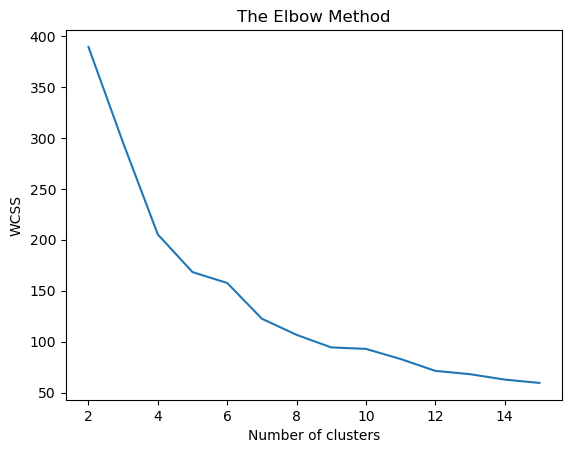

In [23]:
sns.lineplot(x='K', y='WCSS', data=  optimal_k)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

Silhouette method measure of how internally similar the clusters are (cohesion) versus how different or distinct they are from other clusters (separation).

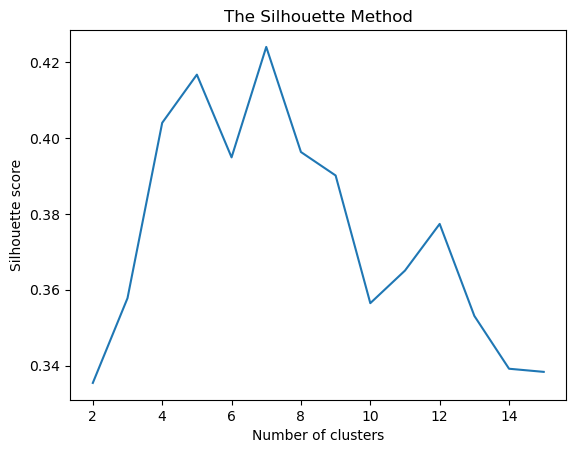

In [24]:
sns.lineplot(x='K', y='silhouette_score', data=  optimal_k)
plt.title('The Silhouette Method')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')
plt.show()

From the elbow method and Silhouette score, it seems that the optimal number of clusters is k=6.

## Cluster visualization (2D)

Let's visualize the clusters. To do that, we need to stick to only 2 dimensions. I will drop the Age from the dataset.

In [25]:
df_viz = df.drop('Age', axis=1, inplace=False)

In [26]:
df_viz.head()

,Annual Income (k$),Spending Score (1-100)
0,-1.738999,-0.434801
1,-1.738999,1.195704
2,-1.700830,-1.715913
3,-1.700830,1.040418
4,-1.662660,-0.395980


In [27]:
kmeans = KMeans(n_clusters=6, random_state=300, n_init='auto')
clusters = kmeans.fit_predict(df_viz)
clusters

array([1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5,
       1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 0,
       1, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 0, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2])

In [28]:
kmeans.cluster_centers_

array([[-0.21657044, -0.01169561],
       [-1.30751869, -1.13696536],
       [ 0.99158305,  1.23950275],
       [ 0.70384427, -1.30469201],
       [ 1.87564575, -1.09476801],
       [-1.32954532,  1.13217788]])

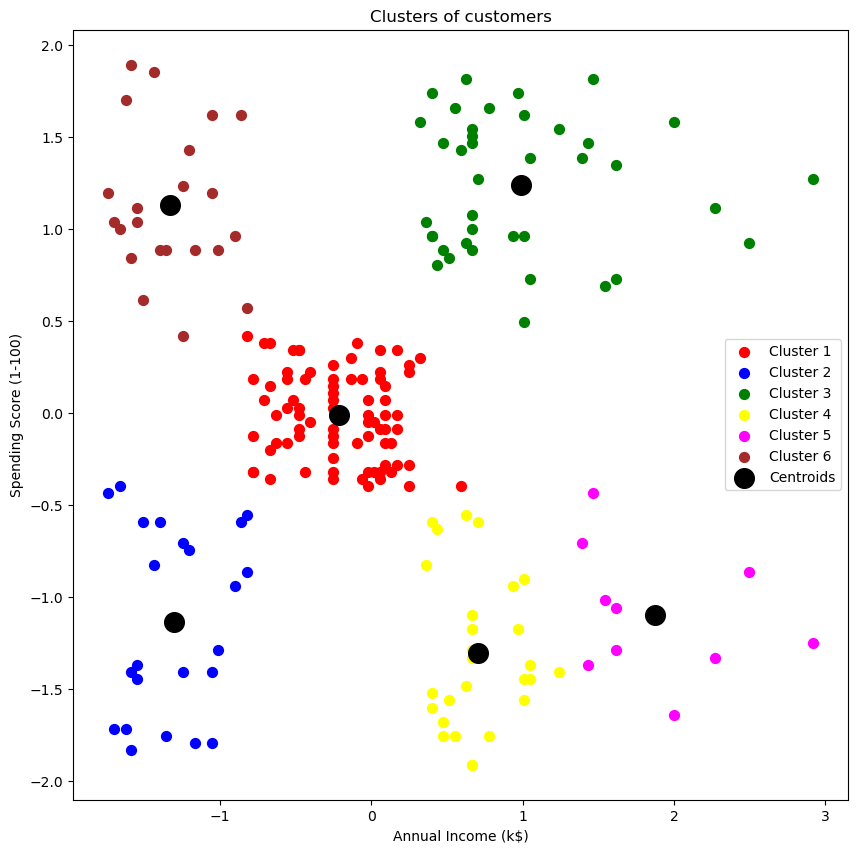

In [29]:
plt.figure(figsize=(10,10))
plt.scatter(df_viz[clusters == 0].iloc[:,0], df_viz[clusters == 0].iloc[:,1], s = 50, c = 'red', label = 'Cluster 1')
plt.scatter(df_viz[clusters == 1].iloc[:,0], df_viz[clusters == 1].iloc[:,1], s = 50, c = 'blue', label = 'Cluster 2')
plt.scatter(df_viz[clusters == 2].iloc[:,0], df_viz[clusters == 2].iloc[:,1], s = 50, c = 'green', label = 'Cluster 3')
plt.scatter(df_viz[clusters == 3].iloc[:,0], df_viz[clusters == 3].iloc[:,1], s = 50, c = 'yellow', label = 'Cluster 4')
plt.scatter(df_viz[clusters == 4].iloc[:,0], df_viz[clusters == 4].iloc[:,1], s = 50, c = 'magenta', label = 'Cluster 5')
plt.scatter(df_viz[clusters == 5].iloc[:,0], df_viz[clusters == 5].iloc[:,1], s = 50, c = 'brown', label = 'Cluster 6')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 200, c = 'black', label = 'Centroids')

plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

Now, how do you relable the clusters? Which customers would you focus on more?

##  2) Hierarchical Clustering

In [30]:
import scipy.cluster.hierarchy as sch

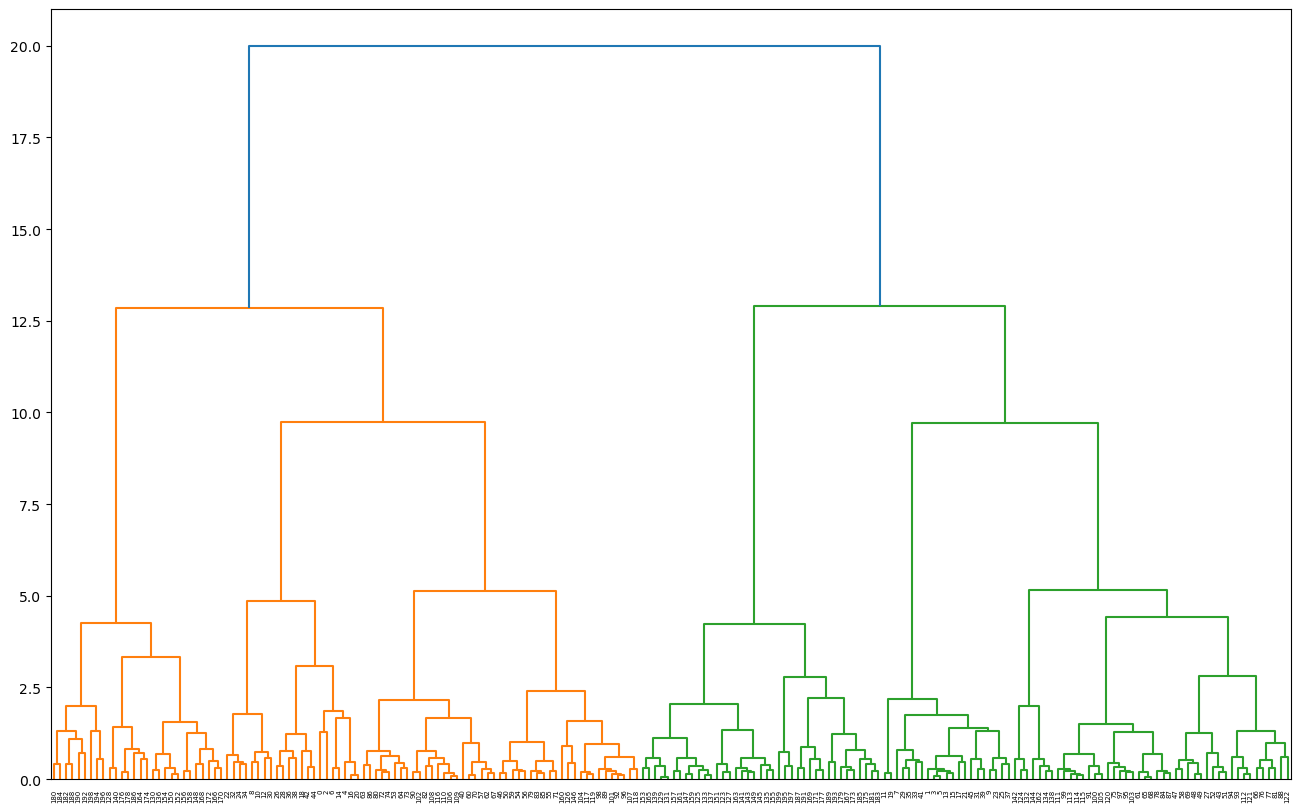

In [31]:
plt.figure(figsize=(16,10))
dend = sch.dendrogram(sch.linkage(df,method='ward'))
# 'ward' uses the 'ward' linkage method (minimize the WCV)

Based on the dendrogram above, the optimal number of clusters is also 6. Why do you think that it is not always easy to find the optimal number of clusters by using a dendrogram?

In [32]:
# Fitting Hierarchical Clustering to the dataset
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 6, metric = 'euclidean', linkage = 'ward')
hc_clusters = hc.fit_predict(df)

In [33]:
hc_clusters

array([4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5,
       4, 5, 4, 5, 4, 0, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 1, 5, 4, 0,
       4, 5, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 2, 0, 2, 1, 2, 3, 2, 3, 2,
       0, 2, 0, 2, 3, 2, 0, 2, 3, 2, 0, 2, 0, 2, 1, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 1, 2, 0, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2], dtype=int64)

In [34]:
kmeans.labels_

array([1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5,
       1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 0,
       1, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 0, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2])

Optional (Silhouette visualization)

In [37]:
#%pip install yellowbrick

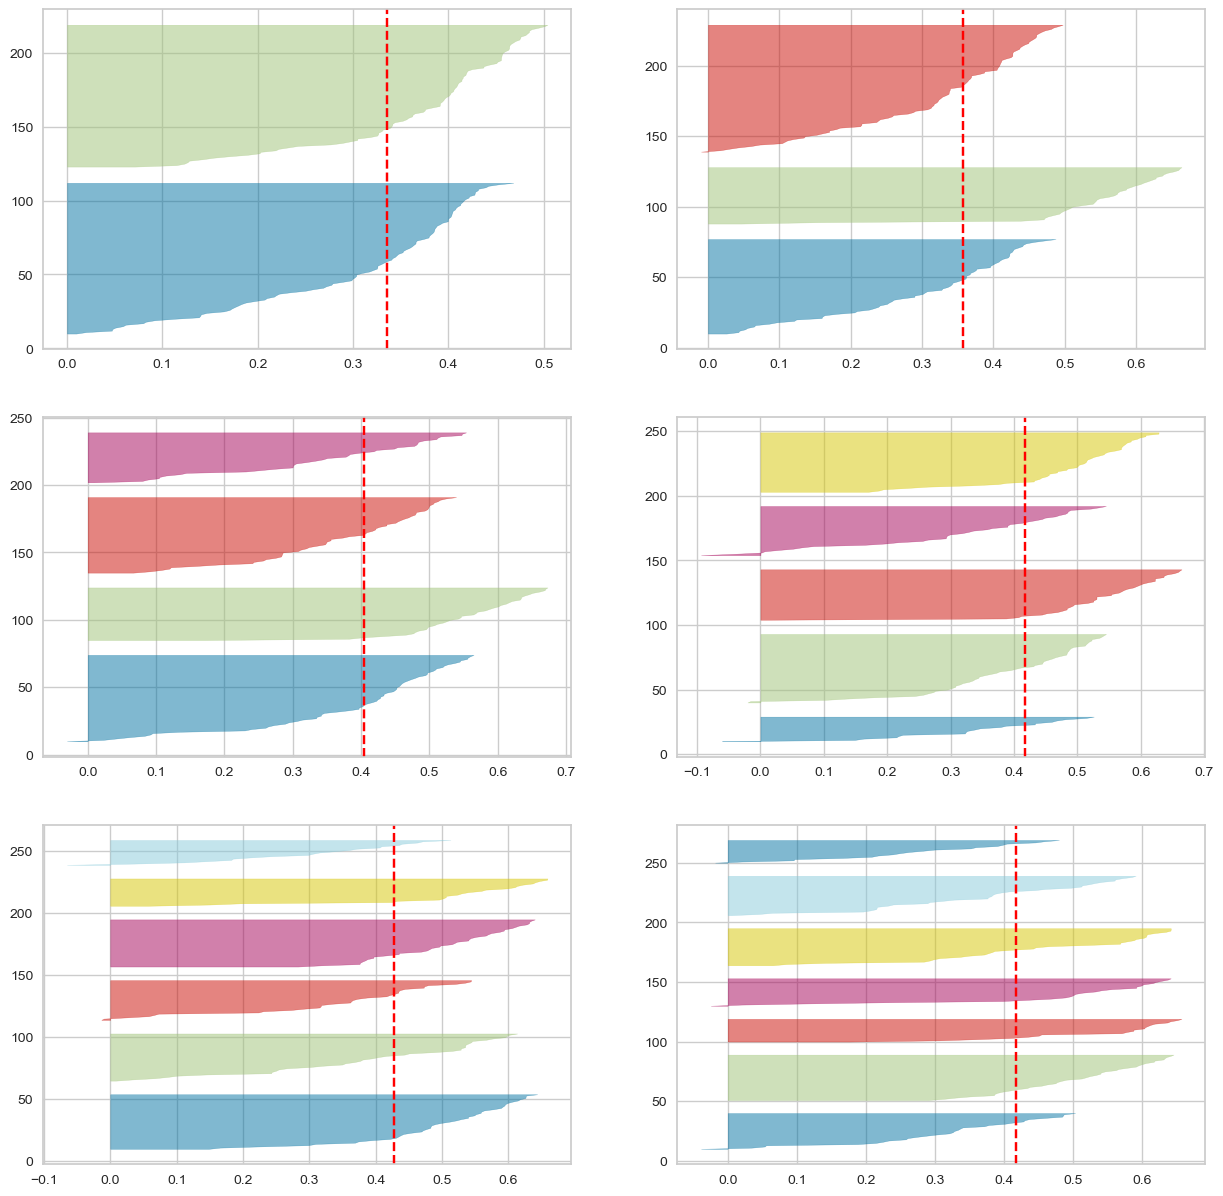

In [38]:
from yellowbrick.cluster import SilhouetteVisualizer

fig, ax = plt.subplots(3, 2, figsize=(15,15))
for i in [ 2,3,4, 5,6,7]:
    '''
    Create KMeans instance for different number of clusters
    '''
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i, 2)
    '''
    Create SilhouetteVisualizer instance with KMeans instance
    Fit the visualizer
    '''
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(df)

-   Width of the Silhouette Plot: The width of each silhouette plot (the horizontal dimension) indicates the size of each cluster (i.e., the number of points in each cluster).

-   Average Silhouette Score: The red dashed line shows the average silhouette score for all samples. This provides an indication of the overall quality of the clustering. A higher average silhouette score suggests better-defined clusters.


Additional links:

1.  Clustering methods in Sklearn : https://scikit-learn.org/stable/modules/clustering.html
2.  Sklearn documentation for K-Mean Clustering: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html
3.  Sklearn documentation for Hierarchical Clustering: https://scikit-learn.org/stable/modules/clustering.html#hierarchical-clustering
4.  Plot Hierarchical Clustering Dendrogram : https://scikit-learn.org/stable/auto_examples/cluster/plot_agglomerative_dendrogram.html
5.  Agglomerative Clustering with SKlearn: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html#sklearn.cluster.AgglomerativeClustering
6.  Performance metrics for clustering: https://towardsdatascience.com/performance-metrics-in-machine-learning-part-3-clustering-d69550662dc6
7.  Silhouette method Sklearn: https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html
8.  Silhouette visualization: https://dzone.com/articles/kmeans-silhouette-score-explained-with-python-exam